In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick


ELEGIMOS 3 ACCIONES DISTINTAS

In [ ]:

# 1. Descargar datos financieros
tickers = ['GGAL.BA', 'BYMA.BA', 'METR.BA']
data = yf.download(tickers, start='2023-05-01', end='2025-03-28', progress=False)['Close']

# 2. Calcular los rendimientos diarios
returns = data.pct_change().dropna()



.pct_change() calcula la variación porcentual diaria:
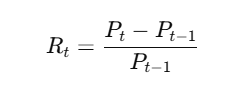

.dropna() elimina el primer día (porque no tiene día anterior para calcular el retorno).



In [ ]:
# 3. Calcular el rendimiento diario del portafolio (asumiendo igualdad en inversiones iniciales)
weights = [0.33, 0.33, 0.34]  # Pesos iguales para simplificar
portfolio_returns = (returns * weights).sum(axis=1)


**Pesos del portafolio**:  
Asume que el capital está invertido **casi equitativamente** entre los tres activos:
- 33% en GGAL
- 33% en BYMA
- 34% en METR  
(Suman 100%).

In [ ]:
# 4. Agregar una columna de mes-año al índice
portfolio_returns = portfolio_returns.to_frame(name='Portfolio Return')
portfolio_returns['Month'] = portfolio_returns.index.to_period('M')

# 5. Agrupar por mes y calcular el rendimiento promedio mensual
monthly_returns = portfolio_returns.groupby('Month').mean()

**Convertir Serie a DataFrame**:  
Pasa de una serie (una sola columna sin nombre) a un DataFrame con nombre `'Portfolio Return'`.

Convierte cada fecha diaria en un período mensual (por ejemplo, '2023-07') para poder agrupar luego.

- Agrupa los datos por mes (`'Month'`) y saca el promedio de los retornos diarios de cada mes.
- El resultado es el **rendimiento promedio mensual del portafolio**.


<Figure size 1200x600 with 0 Axes>

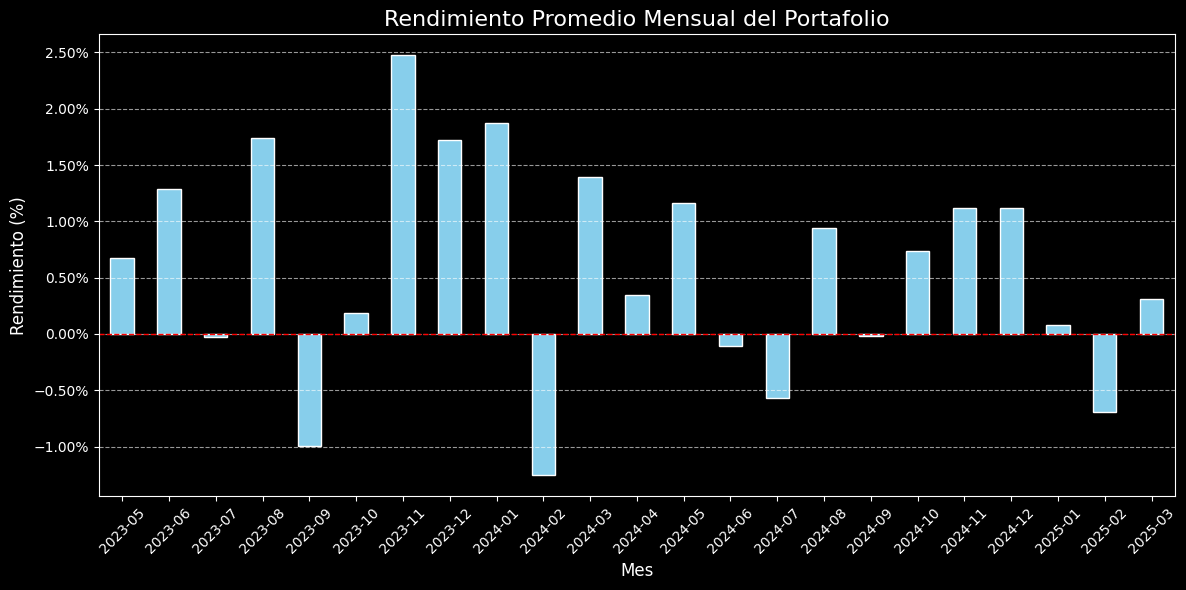

In [ ]:
# 6. Crear un gráfico de barras con fondo oscuro
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))
monthly_returns.plot(
    kind='bar',
    legend=False,
    figsize=(12, 6),
    color='skyblue',
    edgecolor='white'
)
plt.title("Rendimiento Promedio Mensual del Portafolio", fontsize=16, color='white')
plt.ylabel("Rendimiento (%)", fontsize=12, color='white')
plt.xlabel("Mes", fontsize=12, color='white')
plt.xticks(rotation=45, color='white')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Línea base en rojo
plt.grid(axis='y', linestyle='--', alpha=0.6, color='white')

# Convertir el eje Y a porcentajes
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.tight_layout()
plt.show()